## **Smart Grid Stability and Load Balancing**

In [2]:
import pandas as pd

# Load dataset
file_path = 'smart_meter_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Show first few rows to understand structure
print(data.head())

             Timestamp  Electricity_Consumed  Temperature  Humidity  \
0  2024-01-01 00:00:00              0.457786     0.469524  0.396368   
1  2024-01-01 00:30:00              0.351956     0.465545  0.451184   
2  2024-01-01 01:00:00              0.482948     0.285415  0.408289   
3  2024-01-01 01:30:00              0.628838     0.482095  0.512308   
4  2024-01-01 02:00:00              0.335974     0.624741  0.672021   

   Wind_Speed  Avg_Past_Consumption Anomaly_Label  
0    0.445441              0.692057        Normal  
1    0.458729              0.539874        Normal  
2    0.470360              0.614724        Normal  
3    0.576241              0.757044        Normal  
4    0.373004              0.673981        Normal  


In [4]:
# Check column names, data types, and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             5000 non-null   object 
 1   Electricity_Consumed  5000 non-null   float64
 2   Temperature           5000 non-null   float64
 3   Humidity              5000 non-null   float64
 4   Wind_Speed            5000 non-null   float64
 5   Avg_Past_Consumption  5000 non-null   float64
 6   Anomaly_Label         5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB
None


In [5]:
# Check for missing values
print(data.isnull().sum())

Timestamp               0
Electricity_Consumed    0
Temperature             0
Humidity                0
Wind_Speed              0
Avg_Past_Consumption    0
Anomaly_Label           0
dtype: int64


In [6]:
# Convert Timestamp column to datetime type for time-based operations
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [7]:
# Check again after conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             5000 non-null   datetime64[ns]
 1   Electricity_Consumed  5000 non-null   float64       
 2   Temperature           5000 non-null   float64       
 3   Humidity              5000 non-null   float64       
 4   Wind_Speed            5000 non-null   float64       
 5   Avg_Past_Consumption  5000 non-null   float64       
 6   Anomaly_Label         5000 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB
None


In [8]:
# Summary statistics for numerical columns
print(data.describe())

# Check value counts for Anomaly_Label (target variable)
print(data['Anomaly_Label'].value_counts())

                           Timestamp  Electricity_Consumed  Temperature  \
count                           5000           5000.000000  5000.000000   
mean   2024-02-22 01:45:00.000000256              0.376677     0.525069   
min              2024-01-01 00:00:00              0.000000     0.000000   
25%              2024-01-27 00:52:30              0.265349     0.434253   
50%              2024-02-22 01:45:00              0.377244     0.524052   
75%              2024-03-19 02:37:30              0.486002     0.617281   
max              2024-04-14 03:30:00              1.000000     1.000000   
std                              NaN              0.164117     0.135603   

          Humidity   Wind_Speed  Avg_Past_Consumption  
count  5000.000000  5000.000000           5000.000000  
mean      0.497632     0.464628              0.458738  
min       0.000000     0.000000              0.000000  
25%       0.398956     0.382906              0.358857  
50%       0.497539     0.464958             

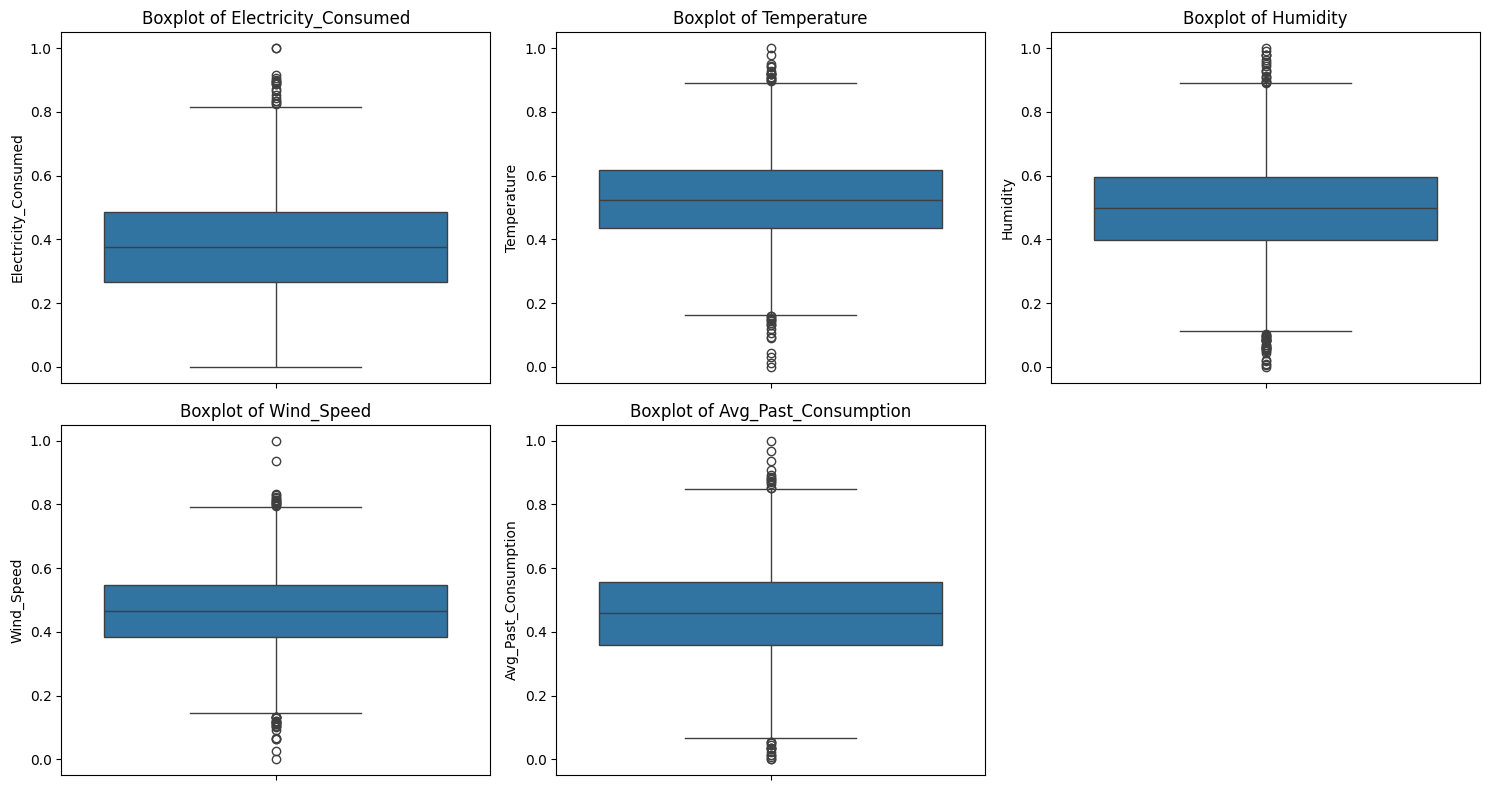

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick check for outliers using boxplot for each numeric feature
num_cols = ['Electricity_Consumed', 'Temperature', 'Humidity', 'Wind_Speed', 'Avg_Past_Consumption']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


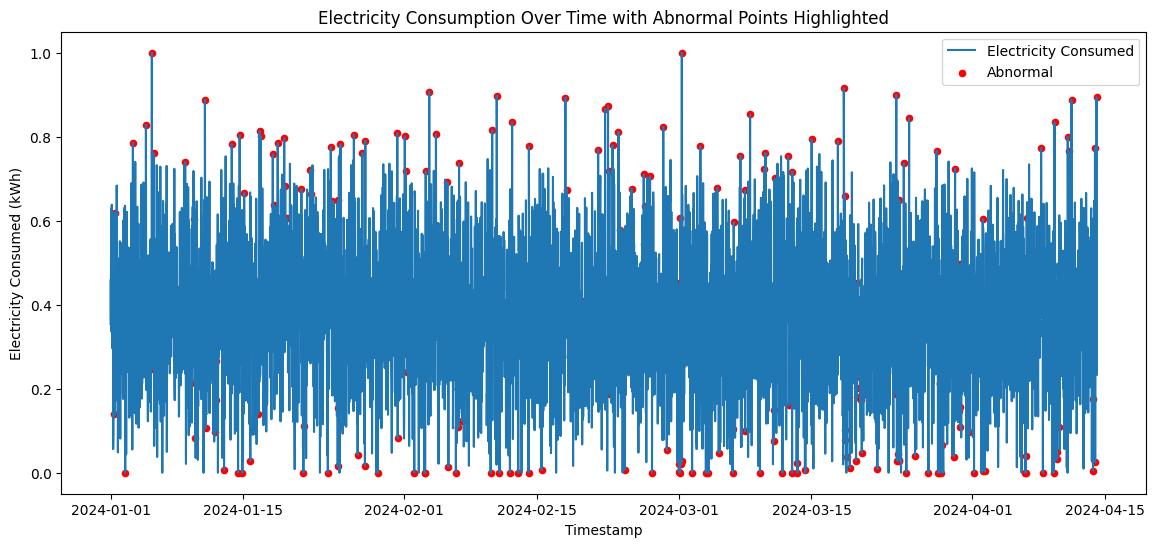

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot electricity consumption over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp', y='Electricity_Consumed', data=data, label='Electricity Consumed')

# Highlight 'Abnormal' points on the plot
abnormal_points = data[data['Anomaly_Label'] == 'Abnormal']
plt.scatter(abnormal_points['Timestamp'], abnormal_points['Electricity_Consumed'], color='red', label='Abnormal', s=20)
plt.title('Electricity Consumption Over Time with Abnormal Points Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Consumed (kWh)')
plt.legend()
plt.show()

